<h1 align='center' style='color:purple'>Sonar Mines vs Rocks</h1>


The focus of this project will be the Sonar Mines vs Rocks dataset. The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

We are going to cover the following steps:

* Loading Necessary Libraries
* Read and Analyze the dataset
* Visualize the dataset 
* Prepare Data
* Model and Evaluate Algorithms
* Improve Accuracy or Results
* Finalize Model 

Goal: Predict metal or rock objects from sonar return data


To start, we downloaded the dataset from the UCI website (http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)#:~:text=Data%20Set%20Information%3A,from%20rocks%20under%20similar%20conditions.) and loaded to MySQL.

## Loading Necessary Libraries

In [1]:
# Load libraries
from pandasql import sqldf
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import joblib
import pickle

# from pickle import dump
# from pickle import load
from datetime import datetime
from numpy import set_printoptions
pd.set_option('display.width', 100)
pd.set_option('precision', 5)

## Read and Analyze the dataset

In [2]:
columns = ['Column_'+str(i) for i in range(1,61)]
columns.append('Result')

df = pd.read_csv('Sonar_Mines_vs_Rocks.csv', header = 0, names = columns)

In [3]:
#Dimensions of the dataset.
df.shape

(207, 61)

In [4]:
# Types of the attributes.
# df.info()
df.dtypes

Column_1     float64
Column_2     float64
Column_3     float64
Column_4     float64
Column_5     float64
              ...   
Column_57    float64
Column_58    float64
Column_59    float64
Column_60    float64
Result        object
Length: 61, dtype: object

In [5]:
df.sample(10)

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Result
193,0.0392,0.0108,0.0267,0.0257,0.0410,0.0491,0.1053,0.1690,0.2105,0.2471,...,0.0083,0.0080,0.0026,0.0079,0.0042,0.0071,0.0044,0.0022,0.0014,M
97,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,M
125,0.0715,0.0849,0.0587,0.0218,0.0862,0.1801,0.1916,0.1896,0.2960,0.4186,...,0.0153,0.0121,0.0096,0.0196,0.0042,0.0066,0.0099,0.0083,0.0124,M
43,0.0257,0.0447,0.0388,0.0239,0.1315,0.1323,0.1608,0.2145,0.0847,0.0561,...,0.0096,0.0153,0.0096,0.0131,0.0198,0.0025,0.0199,0.0255,0.0180,R
165,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M
25,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
83,0.0378,0.0318,0.0423,0.0350,0.1787,0.1635,0.0887,0.0817,0.1779,0.2053,...,0.0046,0.0044,0.0078,0.0102,0.0065,0.0061,0.0062,0.0043,0.0053,R
106,0.0428,0.0555,0.0708,0.0618,0.1215,0.1524,0.1543,0.0391,0.0610,0.0113,...,0.0142,0.0179,0.0079,0.0060,0.0131,0.0089,0.0084,0.0113,0.0049,M
102,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
178,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087,M


In [6]:
# Statistical summary of all attributes.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Column_1,207.0,0.02921,0.02304,0.0015,0.01330,0.0228,0.03580,0.1371
Column_2,207.0,0.03844,0.03304,0.0006,0.01640,0.0308,0.04810,0.2339
Column_3,207.0,0.04384,0.03852,0.0015,0.01890,0.0342,0.05820,0.3059
Column_4,207.0,0.05405,0.04658,0.0058,0.02445,0.0441,0.06570,0.4264
Column_5,207.0,0.07510,0.05567,0.0067,0.03770,0.0620,0.10105,0.4010
Column_6,207.0,0.10460,0.05925,0.0102,0.06695,0.0921,0.13415,0.3823
Column_7,207.0,0.12159,0.06190,0.0033,0.08060,0.1056,0.15305,0.3729
Column_8,207.0,0.13468,0.08534,0.0055,0.08035,0.1119,0.16980,0.4590
Column_9,207.0,0.17736,0.11831,0.0075,0.09675,0.1522,0.23150,0.6828
Column_10,207.0,0.20825,0.13474,0.0113,0.11115,0.1810,0.26900,0.7106


In [7]:
#Count missing values.

print('Number of NaN in the dataframe columns:\n', df.isnull().sum())
print('Total number of NaN in the dataframe: ', df.isnull().sum().sum())

Number of NaN in the dataframe columns:
 Column_1     0
Column_2     0
Column_3     0
Column_4     0
Column_5     0
            ..
Column_57    0
Column_58    0
Column_59    0
Column_60    0
Result       0
Length: 61, dtype: int64
Total number of NaN in the dataframe:  0


In [8]:
# df.groupby(60).size()
print(sqldf("SELECT  DISTINCT(RESULT) FROM df")) 

  Result
0      R
1      M


In [9]:
print("Rocks: ", sqldf("SELECT COUNT(*) FROM df WHERE RESULT=='R' " ) ) 
print("Mines: ", sqldf("SELECT COUNT(*) FROM df WHERE RESULT=='M' ") )

Rocks:     COUNT(*)
0        96
Mines:     COUNT(*)
0       111


## Visualize the dataset 

1. Univariate plots to better understand each attribute

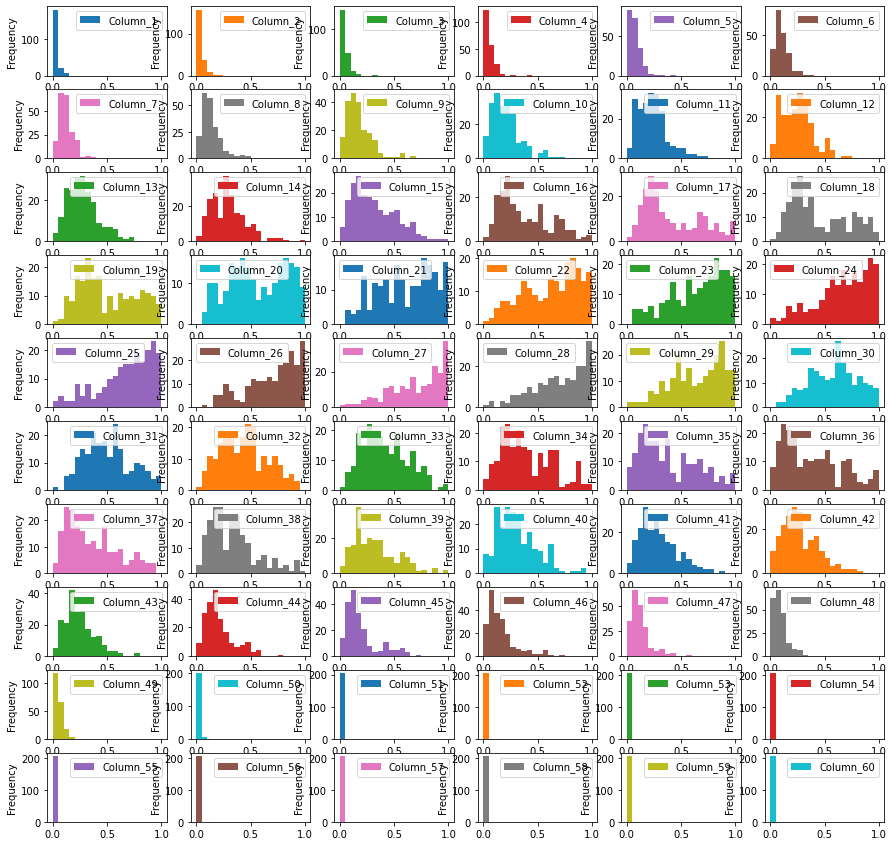

In [10]:
df.plot(kind='hist', subplots=True, layout=(10,6), sharex=False,bins = 20, figsize=(15,15))
plt.show()

**Analysis : It is observed that some features have gaussian distribution and some have exponential distribution.**

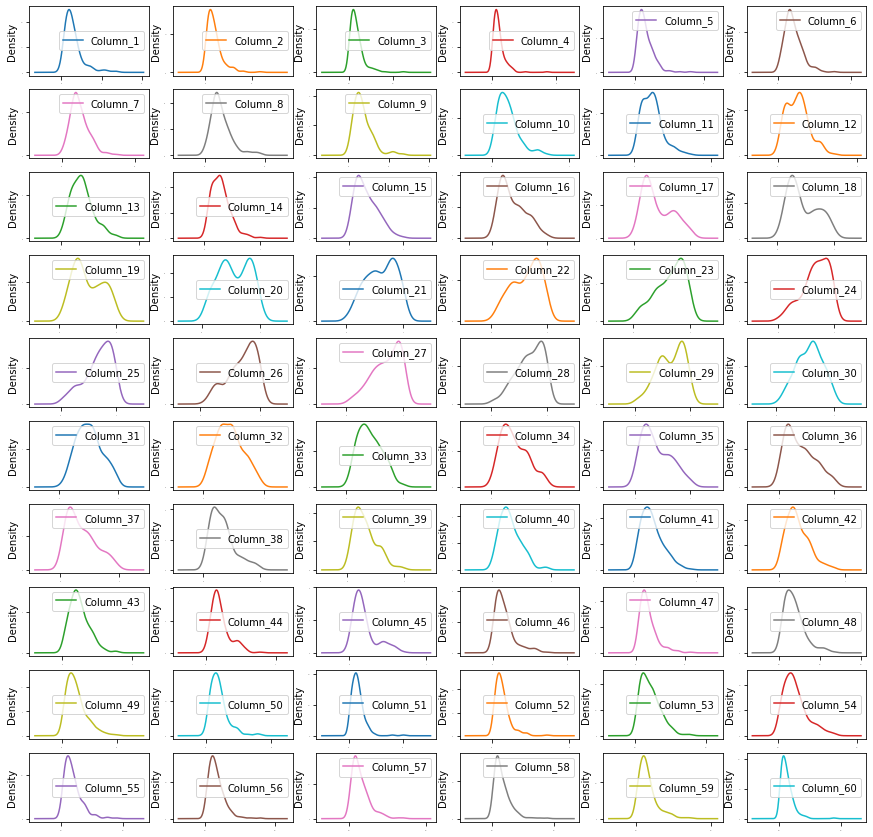

In [11]:
# Unimodal Density Visualization
df.plot(kind='density', subplots=True, sharex=False, sharey=False, layout=(10,6) ,fontsize=1,figsize=(15,15))
plt.show()

**Analysis : It is observed that many of the features have skewed distribution.**

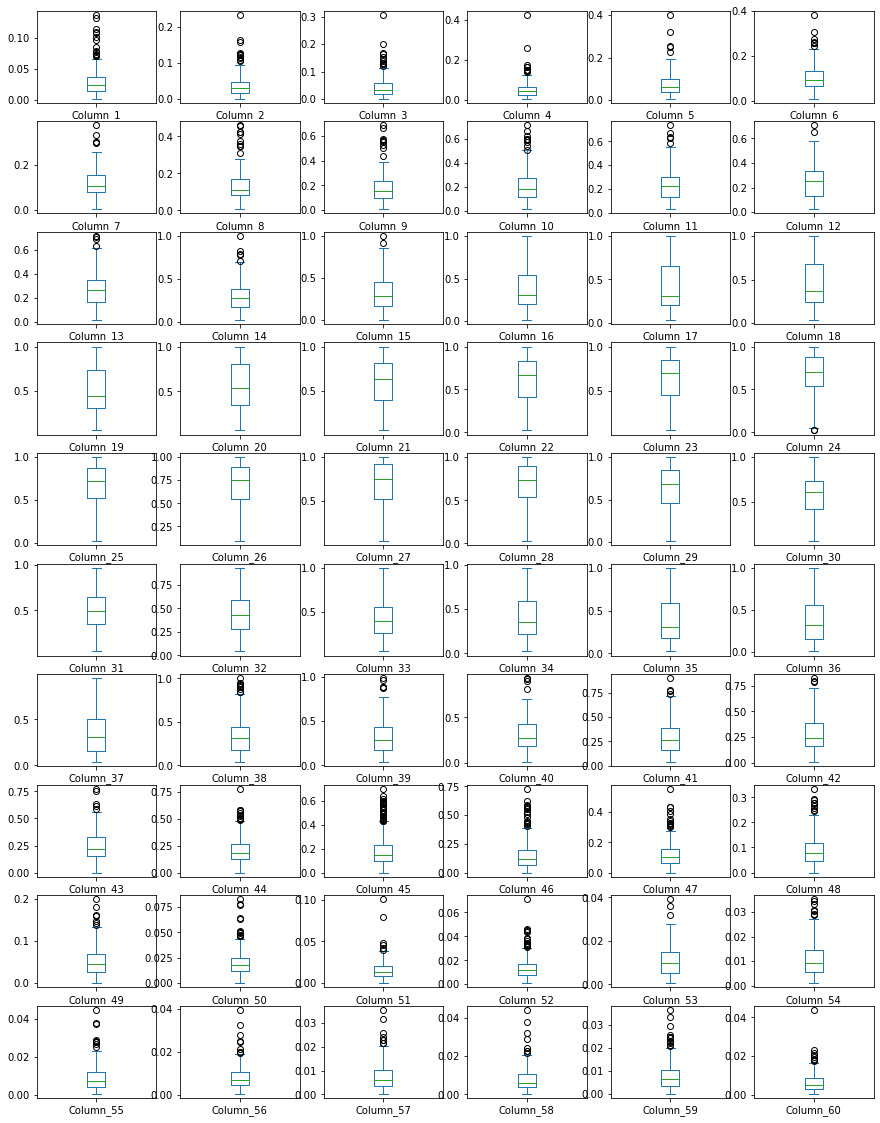

In [12]:
df.plot(kind='box', subplots=True, layout=(10,6), sharex=False, figsize=(15,20))
plt.show()

 2. Multivariate plots to better understand the relationships between attributes

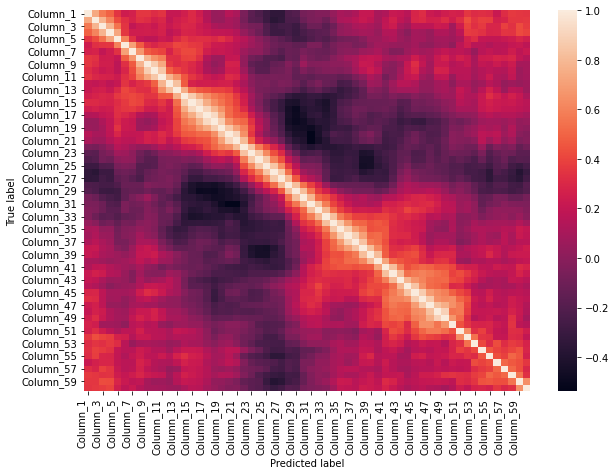

In [13]:
plt.figure(figsize=(10, 7))
hmap = sns.heatmap(df.corr())
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=90, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

**Analysis : It looks like there is also some structure in the order of the attributes. The red around the diagonal suggests that attributes that are next to each other are generally more correlated with each other. The dark red patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.**

**So some thoughts of what we can play around with later is:**
* Standardising the data
* Transforming it
* Thinning out highly correlated variables

## Prepare Data

Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

#### a) Feature Selection, Scaling and Data Pre-Processing


#### c) Display the Final Datasets for Model-Building

In [14]:
# Encode M and R with 1 and 0
df['Result'].replace('M', 1, inplace=True)
df['Result'].replace('R', 0, inplace=True)
df.groupby('Result').size() 

Result
0     96
1    111
dtype: int64

In [15]:
# Check
df.sample(10)

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Result
184,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,1
31,0.0195,0.0213,0.0058,0.0190,0.0319,0.0571,0.1004,0.0668,0.0691,0.0242,...,0.0157,0.0074,0.0271,0.0203,0.0089,0.0095,0.0095,0.0021,0.0053,0
60,0.0135,0.0045,0.0051,0.0289,0.0561,0.0929,0.1031,0.0883,0.1596,0.1908,...,0.0037,0.0084,0.0102,0.0096,0.0024,0.0037,0.0028,0.0030,0.0030,0
85,0.0188,0.0370,0.0953,0.0824,0.0249,0.0488,0.1424,0.1972,0.1873,0.1806,...,0.0093,0.0033,0.0113,0.0030,0.0057,0.0090,0.0057,0.0068,0.0024,0
13,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062,0
51,0.0087,0.0046,0.0081,0.0230,0.0586,0.0682,0.0993,0.0717,0.0576,0.0818,...,0.0052,0.0038,0.0079,0.0114,0.0050,0.0030,0.0064,0.0058,0.0030,0
94,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,0
33,0.0311,0.0491,0.0692,0.0831,0.0079,0.0200,0.0981,0.1016,0.2025,0.0767,...,0.0087,0.0032,0.0130,0.0188,0.0101,0.0229,0.0182,0.0046,0.0038,0
92,0.0459,0.0437,0.0347,0.0456,0.0067,0.0890,0.1798,0.1741,0.1598,0.1408,...,0.0067,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056,0
111,0.0454,0.0472,0.0697,0.1021,0.1397,0.1493,0.1487,0.0771,0.1171,0.1675,...,0.0120,0.0042,0.0238,0.0129,0.0084,0.0218,0.0321,0.0154,0.0053,1


In [16]:
# Split data into training and validation datasets
arr = df.values
X = arr[:,0:60]
y = arr[:,60]

test_size = 0.2
seed = 6
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_test.shape: {} Y_test.shape: {}".format(X_test.shape, Y_test.shape))

X_train.shape: (165, 60) Y_train.shape: (165,)
X_test.shape: (42, 60) Y_test.shape: (42,)


## Model and Evaluate Algorithms

After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

Defining test options such as cross validation and the evaluation metric to use.
Spot checking a suite of linear and nonlinear machine learning algorithms.
Comparing the estimated accuracy of algorithms.
For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

* Linear Algorithm: Logistic Regression

* Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

* Ensemble Algorithms: Bagged CART, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

In [17]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'
seedNum=6

In [18]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [19]:
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    print(f'{name}: Accuracy of {round(cv_results.mean(),2)*100}% (std: {round(cv_results.std(),4)}) Training time: {datetime.now() - startTimeModule}')

LR: Accuracy of 76.0% (std: 0.1104) Training time: 0:00:00.154451
CART: Accuracy of 66.0% (std: 0.0956) Training time: 0:00:00.030748
NB: Accuracy of 66.0% (std: 0.0991) Training time: 0:00:00.007854
KNN: Accuracy of 79.0% (std: 0.1122) Training time: 0:00:00.023146
SVM: Accuracy of 79.0% (std: 0.138) Training time: 0:00:00.023135
BT: Accuracy of 72.0% (std: 0.1364) Training time: 0:00:00.208690
RF: Accuracy of 80.0% (std: 0.1085) Training time: 0:00:00.802805
ET: Accuracy of 83.0% (std: 0.1269) Training time: 0:00:00.533635
AB: Accuracy of 79.0% (std: 0.0889) Training time: 0:00:00.622181
GBM: Accuracy of 82.0% (std: 0.1038) Training time: 0:00:01.352612


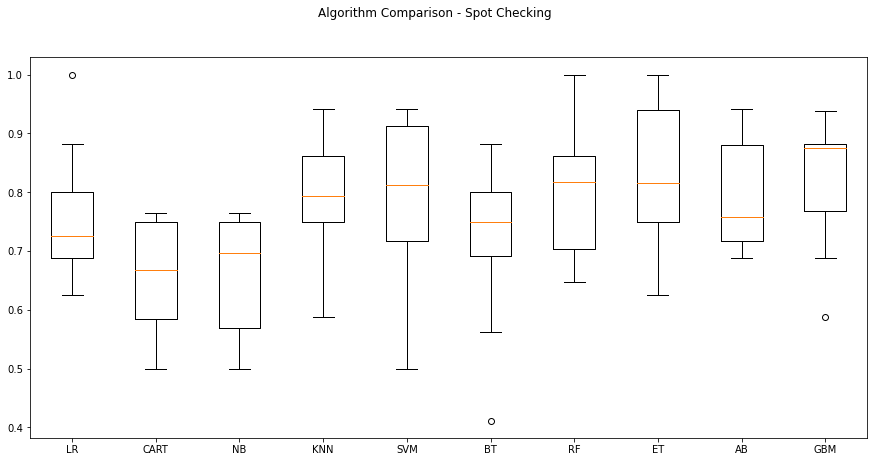

In [20]:
# Spot-checking baseline algorithms
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Improve Accuracy

After we achieve a short list of machine learning algorithms with good level of accuracy, we can tune the algorithms that shows high accuracy.

In [21]:
# Set up the comparison array
results = []
names = []

In [22]:
# Tuning algorithm #1 - ExtraTreesClassifier
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=np.array([10,50,100,500,1000]))
model1 = ExtraTreesClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum, shuffle = True)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('BT')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.871324 using {'n_estimators': 50}
0.799265 (0.075205) with: {'n_estimators': 10}
0.871324 (0.098623) with: {'n_estimators': 50}
0.834191 (0.126851) with: {'n_estimators': 100}
0.829412 (0.107466) with: {'n_estimators': 500}
0.841176 (0.112896) with: {'n_estimators': 1000}
Model training time: 0:00:08.867138


In [23]:
# Tuning algorithm #2 - GradientBoostingClassifier
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([10,50,100,500,1000]))
model2 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum, shuffle = True)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.842279 using {'n_estimators': 500}
0.671691 (0.094064) with: {'n_estimators': 10}
0.800000 (0.124699) with: {'n_estimators': 50}
0.818382 (0.103768) with: {'n_estimators': 100}
0.842279 (0.101293) with: {'n_estimators': 500}
0.842279 (0.101293) with: {'n_estimators': 1000}
Model training time: 0:00:15.339769


## Finalize Model

Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:

* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

#### Predictions on validation dataset

In [24]:
model = ExtraTreesClassifier(n_estimators=50, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(Y_test, predictions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(Y_test, predictions), '\n')
print('Classification Report : \n ',classification_report(Y_test, predictions))

Accuracy:  83.33333333333334 

Confusion Matrix : 
 [[15  4]
 [ 3 20]] 

Classification Report : 
                precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        19
         1.0       0.83      0.87      0.85        23

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



 **Analysis**: It is observed that we achieve an accuracy of nearly 83% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of ExtraTreesClassifier.

#### Create standalone model on entire training dataset

In [25]:
startTimeModule = datetime.now()
finalModel = ExtraTreesClassifier(n_estimators=50, random_state=seedNum)
finalModel.fit(X_train, Y_train)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.027591


#### Save model for later use

In [26]:
pickle.dump(model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))


# joblib.dump(finalModel, '../Sonar-Mines-Rocks/Sonar_Mines_vs_Rocks.sav')

# # Some time later..load the saved model and check prediction:
# model = joblib.load('Sonar_Mines_vs_Rocks.sav')
# model= model.predict(X_test) 
# print('Accuracy: ', accuracy_score(Y_test, model) * 100)